In [2]:
#data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#create dataframes for visualization

iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(Y, columns=['Species'])

In [6]:
#We have three species 0,1 and 2
def flower(num):
    if num ==0:
        return 'Setosa'
    elif num==1:
        return 'Vesicolour'
    else:
        return 'Verginica'

In [8]:
#label flowers and combine dataframes
iris_target['Species'] = iris_target['Species'].apply(flower)

In [9]:
#combine dataframes
iris = pd.concat([iris_data, iris_target], axis=1)

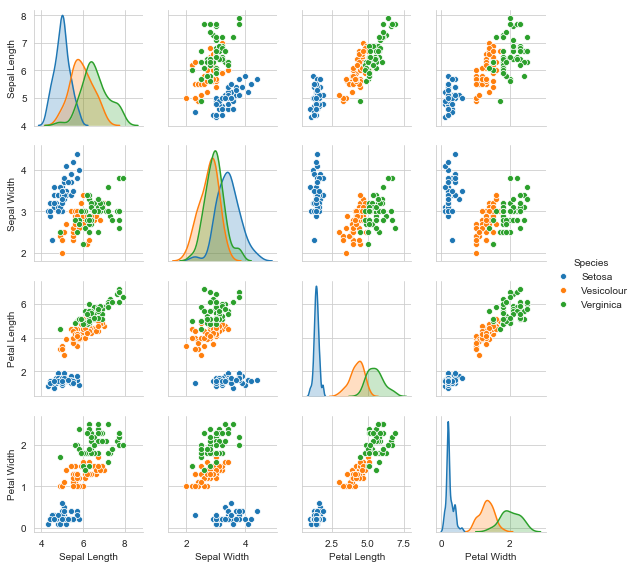

In [12]:
sns.pairplot(iris, hue='Species', height=2)

TypeError: 'NoneType' object is not iterable

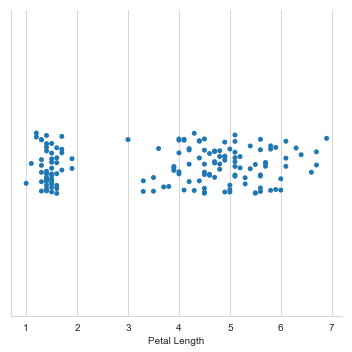

In [26]:
sns.catplot('Petal Length', hue='Species', data=iris, height=5, kind='strip')

In [27]:
#train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4)

log_reg.fit(X_train, Y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
#test accuracy
from sklearn import metrics
Y_pred = log_reg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


In [31]:
#confusion matrix
print(metrics.confusion_matrix(Y_test, Y_pred))

[[23  0  0]
 [ 0 17  4]
 [ 0  0 16]]


In [32]:
#train gaussianNB model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

log_reg = GaussianNB()
log_reg.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
#test accuracy
from sklearn import metrics
Y_pred = log_reg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [34]:
#confusion matrix
print(metrics.confusion_matrix(Y_test, Y_pred))

[[23  0  0]
 [ 0 19  2]
 [ 0  1 15]]


In [35]:
#Randomforest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

#Creating training set and test set from data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
Y_pred = classifier.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_pred))

[[13  0  0]
 [ 0 12  2]
 [ 0  2 16]]
